In [16]:
df, files, header_dict = load_data()
df = df.loc[df.index == files[1],]

In [17]:
X = (df['datetime'] - df['datetime'].min())  / np.timedelta64(1,'D')
X = X.to_numpy().reshape((-1,1))
X = X[-1000:-1]

In [18]:
y = df['no2']
y = y.to_numpy().reshape((-1,1))
y.shape

(350677, 1)

In [19]:
for i in range(len(y)):
    if np.isnan(y[i])[0]:
        y[i] = y[i-1]

In [20]:
y = y[-1000:-1]
y = np.log(y)

In [21]:
del df
del _
del series

In [99]:
k2 =  ExpSineSquared(length_scale = 2.0, periodicity = .5, periodicity_bounds=(0.25, 0.75), length_scale_bounds=(1e-1, 100.0))+ WhiteKernel(1e-1)
k3 =  ExpSineSquared(length_scale = 0.1, periodicity = 7.0, periodicity_bounds=(6., 8.), length_scale_bounds=(1e-1, 10.0)) #1woche

kernel_gpml = k2+k3

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              normalize_y=True)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(X.min(), X.max() + 7, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

GPML kernel: ExpSineSquared(length_scale=10.9, periodicity=0.582) + WhiteKernel(noise_level=0.276) + ExpSineSquared(length_scale=0.17, periodicity=7.02)
Log-marginal-likelihood: -843.603


In [100]:
y_std = y_std.reshape((-1,1))

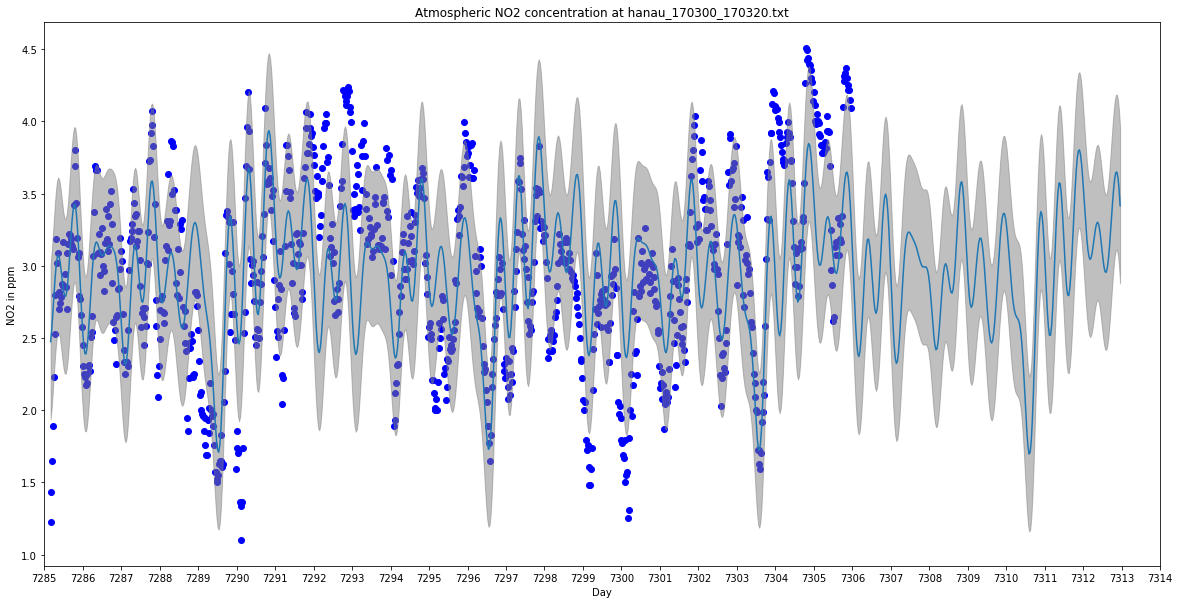

In [101]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, c='b')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], (y_pred - y_std)[:,0], (y_pred + y_std)[:,0],
                 alpha=0.5, color='grey')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Day")
plt.ylabel(r"NO2 in ppm")
plt.title(r"Atmospheric NO2 concentration at "+files[1])
#plt.tight_layout()
plt.xticks(np.arange(7285,7315,step=1))
plt.savefig('../gp.png')
plt.show()